In [25]:
from typing import Tuple
import matplotlib.pyplot as plt
import pandas as pd

## Config

Feel free to modify these.

In [26]:
sequence_length = 10
window_size = 20
verbose = False

## Helpers

In [27]:
class BinaryIterator:
    def __init__(self, length):
        self.max_val = 2 ** length
        self.max_width = length
        self.cur_val = -1
        
    def get_padded_binary(self, val, max_width):
        binary_format = bin(val)[2:]
        return binary_format.zfill(max_width)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.cur_val == self.max_val - 1:
            raise StopIteration()
        self.cur_val += 1
        return self.get_padded_binary(self.cur_val, self.max_width)

def run_sim(length: int, verbose: bool = False) -> Tuple[int, int, pd.DataFrame]:
    binary_iterator = BinaryIterator(length)
    a_wins = 0
    b_wins = 0
    
    out_data = []
    for sequence in binary_iterator:
        a_score = 0
        b_score = 0
        for i in range(len(sequence) - 1):
            
            if sequence[i: i + 2] == '11':
                a_score += 1
            elif sequence[i: i + 2] == '10':
                b_score += 1
                
        if a_score > b_score:
            a_wins += 1
        elif b_score > a_score:
            b_wins += 1
        out_data.append((sequence, a_score, b_score))
        if verbose:
            print(sequence, a_score, b_score)
    return a_wins, b_wins, pd.DataFrame(out_data, columns=('String', 'Alice Score', 'Bob Score'))

In [28]:
alice_wins, bob_wins, df = run_sim(sequence_length, verbose)
df['Delta'] = (df['Alice Score'] - df['Bob Score'])
df = df.sort_values(by=['Delta']).reset_index(drop=True)

## Generate Plot

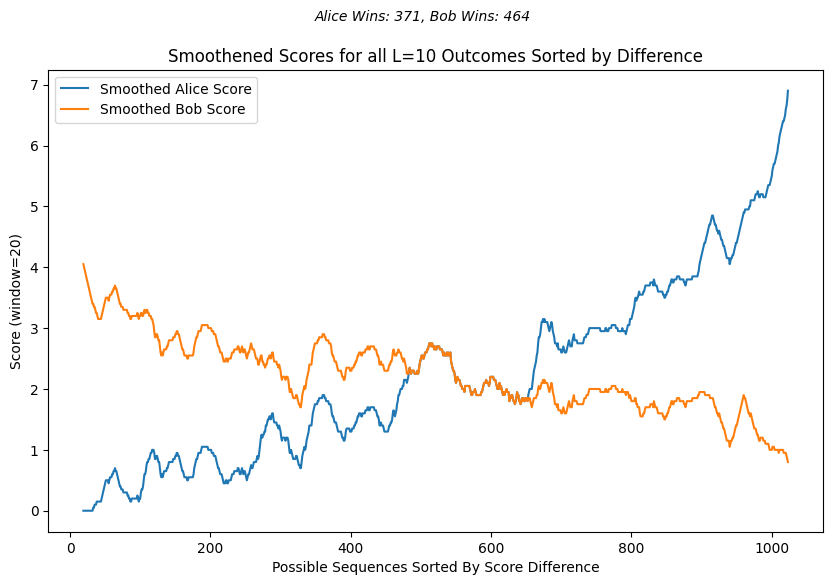

In [29]:
plt.rcParams['agg.path.chunksize'] = 10000  # Adjust this value as needed
# Column names as variables
col_name_a = 'Alice Score'
col_name_b = 'Bob Score'

# Window size for smoothing

# Apply rolling mean (moving average) for smoothing
smoothed_a = df[col_name_a].rolling(window=window_size).mean()
smoothed_b = df[col_name_b].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot smoothed data
plt.plot(df.index, smoothed_a, label=f'Smoothed {col_name_a}')
plt.plot(df.index, smoothed_b, label=f'Smoothed {col_name_b}')

plt.xlabel(f'Possible Sequences Sorted By Score Difference')
plt.ylabel(f'Score (window={window_size})')
plt.title(f'Smoothened Scores for all L={sequence_length} Outcomes Sorted by Difference')
plt.suptitle(f'Alice Wins: {alice_wins}, Bob Wins: {bob_wins}', fontsize=10, style='italic', verticalalignment='top')

plt.legend()
plt.show()